# Load Libraries 

In [1]:
import re
import math
import MDAnalysis as mda
from MDAnalysis.analysis import align, rms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob as g
import gc

# Functions

In [2]:
def mindist(sel1, sel2):
    list_o_dist = []
    for a in sel1:
        for b in sel2:
            p1 = a.position
            p2 = b.position
            dist = math.sqrt((p2[2]-p1[2])**2+(p2[1]-p1[1])**2+(p2[0]-p1[0])**2)
            list_o_dist.append(dist)
    return min(list_o_dist) 

In [3]:
def distance(point1, point2):
    dist = math.sqrt((point2[2]-point1[2])**2+(point2[1]-point1[1])**2+(point2[0]-point1[0])**2)
    return dist

# Paths to Files and pH range

In [4]:
#phs = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
phs = [2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
path = '/data/jackh/plasmepsin/holo_plasmepsin/run'
pdb = str(path)+'/1sme.pdb'
psf = str(path)+'/1sme.psf'
sstage = 21
lstage = 42
stages = [x for x in range(sstage, lstage+1)]
nskip = 1

# Load Data, Make Selections, Analyze 

In [5]:
# Perform Analysis and Store Data
data = []
for n, ph in enumerate(phs):
    print('Working... pH: ' + str(ph))
    data_sub  = []
    frame = 0 
    for i in range (sstage, lstage+1):
        print(f'stage: {i}')
        with open("data/pH_{}_stage_{}.dat".format(ph, i), "w") as o:    
            o.write('# \n')
            # Set up DCD
            dcd = g.glob('{}/stage{}/*ph{}*dcd*'.format(path, i, ph))[0]
            # Build trajectory object and set max time step - This will also be the mobile trajectories
            u = mda.Universe(psf, dcd, format='DCD')
            # Residues of Interest
            H164_A = u.select_atoms("resname HSP and resid 164 and name ND1 NE2")
            H164_D = u.select_atoms("resname HSP and resid 164 and name HD1 HE2")
            # Group that accept HBs from H164
            T165_A = u.select_atoms("resname THR and resid 165 and name O")
            Y157_A = u.select_atoms("resname TYR and resid 157 and name OH")
            L158_A = u.select_atoms("resname LEU and resid 158 and name O")
            K327_A = u.select_atoms("resname LYS and resid 327 and name O")


            for ts in u.trajectory[::nskip]:
                frame += 1
                
                D1 = mindist(H164_D, T165_A)
                D2 = mindist(H164_D, Y157_A)
                D3 = mindist(H164_D, L158_A)
                D4 = mindist(H164_D, K327_A)
                
                data_sub.append([frame, D1, D2, D3, D4])
                o.write(f'{D1:0.2f} {D2:0.2f} {D3:0.2f} {D4:0.2f} \n')
    data.append(data_sub)
    gc.collect()

Working... pH: 2.5
stage: 21
stage: 22
stage: 23
stage: 24
stage: 25
stage: 26
stage: 27
stage: 28
stage: 29
stage: 30
stage: 31
stage: 32
stage: 33
stage: 34
stage: 35
stage: 36
stage: 37
stage: 38
stage: 39
stage: 40
stage: 41
stage: 42
Working... pH: 3.5
stage: 21
stage: 22
stage: 23
stage: 24
stage: 25
stage: 26
stage: 27
stage: 28
stage: 29
stage: 30
stage: 31
stage: 32
stage: 33
stage: 34
stage: 35
stage: 36
stage: 37
stage: 38
stage: 39
stage: 40
stage: 41
stage: 42
Working... pH: 4.5
stage: 21
stage: 22
stage: 23
stage: 24
stage: 25
stage: 26
stage: 27
stage: 28
stage: 29
stage: 30
stage: 31
stage: 32
stage: 33
stage: 34
stage: 35
stage: 36
stage: 37
stage: 38
stage: 39
stage: 40
stage: 41
stage: 42
Working... pH: 5.5
stage: 21
stage: 22
stage: 23
stage: 24
stage: 25
stage: 26
stage: 27
stage: 28
stage: 29
stage: 30
stage: 31
stage: 32
stage: 33
stage: 34
stage: 35
stage: 36
stage: 37
stage: 38
stage: 39
stage: 40
stage: 41
stage: 42
Working... pH: 6.5
stage: 21
stage: 22
stage

# Distances vs. Time

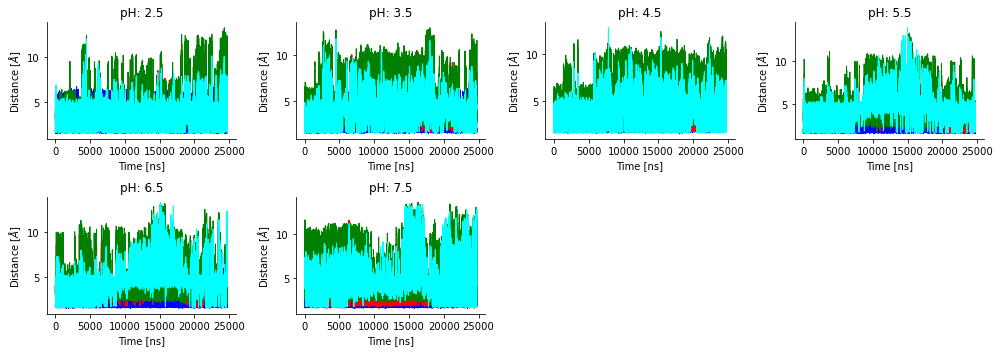

In [6]:
# Fold Cell
plt.close('all')

figrows = math.ceil(len(phs)/4)
figcols = 4
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (14,10/figcols*figrows))
fig.set_facecolor('white')
axes = axes.flatten()
flat_axes = axes.flatten()

#legend = ['K163', 'K327', 'D10']

for index in range(figrows*figcols):
    if index < len(phs):
        # Data
        axes[index].plot([x for x in range(len(data[index]))], [y[1] for y in data[index]], color='blue', linewidth=1)
        axes[index].plot([x for x in range(len(data[index]))], [y[2] for y in data[index]], color='red', linewidth=1)
        axes[index].plot([x for x in range(len(data[index]))], [y[3] for y in data[index]], color='green', linewidth=1)
        axes[index].plot([x for x in range(len(data[index]))], [y[4] for y in data[index]], color='cyan', linewidth=1)
        # Plot Details 
        #axes[index].legend(legend)
        axes[index].set_title('pH: {}'.format(phs[index]))
        axes[index].set_xlabel('Time [ns]')
        axes[index].set_ylabel('Distance [$\AA$]')
        # X and Y Range
        #axes[index].set_ylim(0, 800)
        #axes[index].set_xlim(23, 25)
        axes[index].spines['right'].set_visible(False)
        axes[index].spines['top'].set_visible(False)
    else: 
        axes[index].remove()

    
fig.tight_layout()
plt.show()

# Histograms of Distances

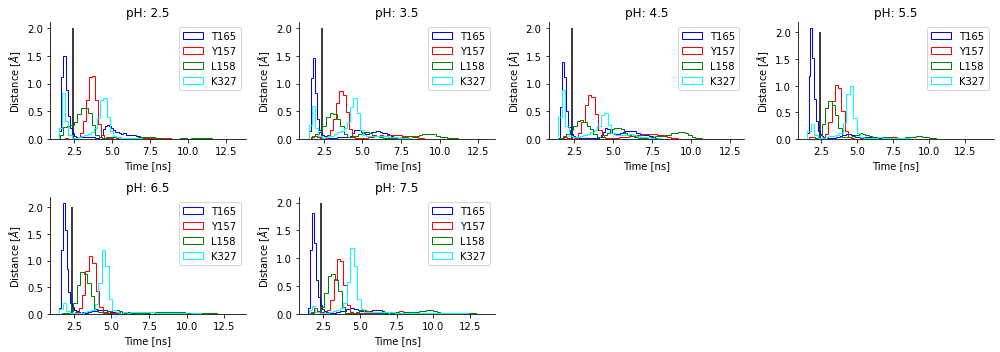

In [7]:
# Fold Cell
plt.close('all')

figrows = math.ceil(len(phs)/4)
figcols = 4
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (14,10/figcols*figrows))
fig.set_facecolor('white')
axes = axes.flatten()
flat_axes = axes.flatten()

legend = ['T165', 'Y157', 'L158', 'K327']

for index in range(figrows*figcols):
    if index < len(phs):
        # Data
        axes[index].hist([y[1] for y in data[index]], bins=50, color='blue', density=True, histtype='step')
        axes[index].hist([y[2] for y in data[index]], bins=50, color='red', density=True, histtype='step')
        axes[index].hist([y[3] for y in data[index]], bins=50, color='green', density=True, histtype='step')
        axes[index].hist([y[4] for y in data[index]], bins=50, color='cyan', density=True, histtype='step')
        axes[index].vlines(2.4, 0, 2, color='Black')
        
        #axes[index].vlines(7, 0, 0.5, color='black')
        # Plot Details 
        axes[index].legend(legend)
        axes[index].set_title('pH: {}'.format(phs[index]))
        axes[index].set_xlabel('Time [ns]')
        axes[index].set_ylabel('Distance [$\AA$]')
        # X and Y Range
        #axes[index].set_ylim(0, 800)
        #axes[index].set_xlim(23, 25)
        axes[index].spines['right'].set_visible(False)
        axes[index].spines['top'].set_visible(False)
    else: 
        axes[index].remove()

    
fig.tight_layout()
plt.show()

# Probability of Forming a Hydrogen Bond Interaction

In [8]:
for datum in data:
    count = 0 
    for dat in datum:
        if dat[1] <= 2.4 or dat[2] <= 2.4 or dat[3] <= 2.4 or dat[4] <= 2.4:
            count += 1
    print(f'{count/len(datum):0.2f}')

0.86
0.72
0.71
0.84
0.85
0.81
